### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Reading the CSV Files.

In [2]:
coffee_production = pd.read_csv('Data/coffee/total-production.csv').T

coffee_production.columns = coffee_production.iloc[0]
coffee_production = coffee_production.drop('total_production')
coffee_production.head()

total_production,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
1990,50.345,122.777,27285.6286,487.393,1503.815,7441.383,982.447,104.628,962.841,130.627,...,214.987,42.783,95.87,757.017,161.308,14.581,1955.009,1122.477,1310.288,0.0
1991,79.331,103.536,27293.4934,667.199,2123.824,8493.196,932.513,124.286,746.816,79.653,...,192.532,54.379,81.549,1468.936,432.652,17.792,2088.001,940.704,1437.848,0.0
1992,77.52,120.235,34603.3542,620.238,1185.48,5569.478,1121.684,137.161,900.111,54.291,...,196.978,39.084,53.181,1254.945,85.648,14.328,2185.074,1215.298,2340.447,0.0
1993,32.608,50.823,28166.9786,393.354,2069.007,6743.288,441.859,62.111,1019.481,70.046,...,142.066,37.451,53.79,1275.201,194.939,16.079,3141.706,1332.881,3020.216,0.0
1994,76.802,116.944,28192.047,664.143,2375.766,5367.878,641.372,84.112,1138.659,24.689,...,248.313,72.738,42.448,1399.135,176.296,18.435,2392.753,988.996,3631.609,0.0


### Coffee Production Stats
- Create a bar chart of the top 10 coffee producers by total production in coffee_product DF, sorted from highest to lowest. Change the xticks to 2 letter country abbreviations

In [3]:
top10_producers = coffee_production.sum().sort_values(ascending = False).iloc[:10]
top10_producers

total_production
Brazil       1190965.7353
Viet Nam      439540.9519
Colombia      345871.4464
Indonesia     245116.7707
Ethiopia      141542.8931
India          132025.681
Mexico        126908.2467
Guatemala     113401.0702
Honduras      105456.5888
Uganda          93146.369
dtype: object

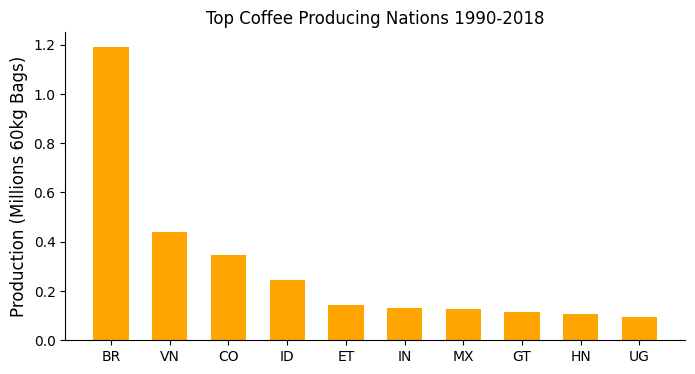

In [4]:
fig, ax = plt.subplots(figsize=(8,4))

ax.bar(top10_producers.index, top10_producers.values/1_000_000, width = .6, color = 'orange')

positions = list(range(10))
labels = ["BR", "VN", "CO", "ID", "ET", "IN", "MX", "GT", "HN", "UG"]

ax.set_title('Top Coffee Producing Nations 1990-2018')
ax.set_ylabel('Production (Millions 60kg Bags)', fontsize=12)

ax.set_xticks(positions)
ax.set_xticklabels(labels)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

### Top 5 overtime
- Create a line chart with the top 5 nations over time. Make sure to include a legend! Consider converting the index to datetime64[ns]

In [5]:
top5 = coffee_production.loc[:, ['Brazil', 'Viet Nam', 'Colombia', 'Indonesia', 'Ethiopia']]
top5.index = top5.index.astype('datetime64[ns]')

top5.head().round()


total_production,Brazil,Viet Nam,Colombia,Indonesia,Ethiopia
1990-01-01,27285.6286,1310.288,14396.0,7441.383,2909.451
1991-01-01,27293.4934,1437.848,17980.397,8493.196,2924.664
1992-01-01,34603.3542,2340.447,14946.878,5569.478,1825.171
1993-01-01,28166.9786,3020.216,11422.422,6743.288,2967.004
1994-01-01,28192.047,3631.609,12964.0,5367.878,2762.73


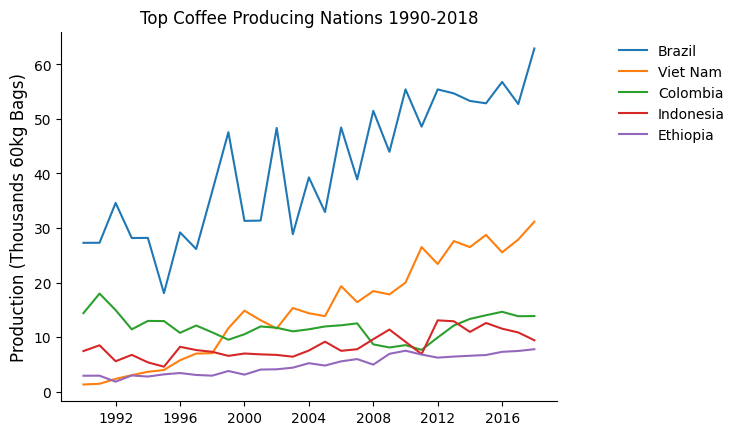

In [6]:
fig, ax = plt.subplots()

ax.plot(top5/1_000)

ax.set_title('Top Coffee Producing Nations 1990-2018')
ax.set_ylabel('Production (Thousands 60kg Bags)', fontsize = 12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(top5.columns, frameon = False, bbox_to_anchor = (1.1, 1))
plt.show()

### Composition Over Time
- The client is interested in looking at how Brazil's share of global coffee production has chnaged overtime.
- Build a plot that global total production as well as Brazil's contribution to global production over time.

In [7]:
coffee_production.head()

total_production,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
1990,50.345,122.777,27285.6286,487.393,1503.815,7441.383,982.447,104.628,962.841,130.627,...,214.987,42.783,95.87,757.017,161.308,14.581,1955.009,1122.477,1310.288,0.0
1991,79.331,103.536,27293.4934,667.199,2123.824,8493.196,932.513,124.286,746.816,79.653,...,192.532,54.379,81.549,1468.936,432.652,17.792,2088.001,940.704,1437.848,0.0
1992,77.52,120.235,34603.3542,620.238,1185.48,5569.478,1121.684,137.161,900.111,54.291,...,196.978,39.084,53.181,1254.945,85.648,14.328,2185.074,1215.298,2340.447,0.0
1993,32.608,50.823,28166.9786,393.354,2069.007,6743.288,441.859,62.111,1019.481,70.046,...,142.066,37.451,53.79,1275.201,194.939,16.079,3141.706,1332.881,3020.216,0.0
1994,76.802,116.944,28192.047,664.143,2375.766,5367.878,641.372,84.112,1138.659,24.689,...,248.313,72.738,42.448,1399.135,176.296,18.435,2392.753,988.996,3631.609,0.0


In [8]:
brazil_vs_others = (
                        coffee_production
                        .assign(rest_of_the_world = coffee_production
                                .drop('Brazil', axis = 1).sum(axis = 1))
                        .loc[:, ['Brazil', 'rest_of_the_world']]
                        .astype({'Brazil': 'float64', 'rest_of_the_world': 'float64'})
                    )

brazil_vs_others.head()

total_production,Brazil,rest_of_the_world
1990,27285.6286,65944.431
1991,27293.4934,73973.191
1992,34603.3542,63922.545
1993,28166.9786,63597.643
1994,28192.0470,65121.147


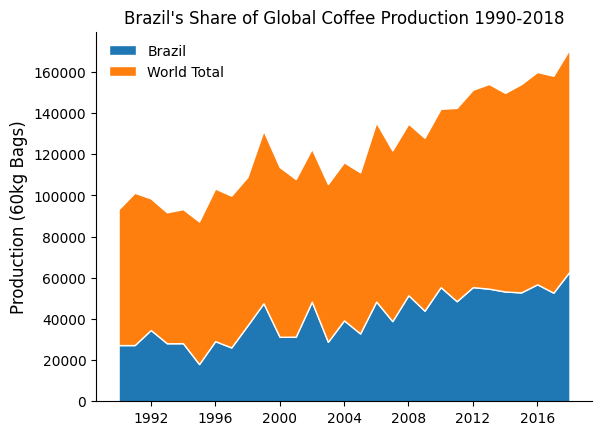

In [9]:
fig, ax = plt.subplots()

ax.stackplot(
    brazil_vs_others.index.astype('datetime64[ns]'),
    brazil_vs_others['Brazil'],
    brazil_vs_others["rest_of_the_world"],
    labels = ['Brazil', 'World Total'],
    edgecolor = 'white'
)

#

ax.set_title("Brazil's Share of Global Coffee Production 1990-2018")
ax.set_ylabel('Production (60kg Bags)', fontsize= 12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend(frameon = False, loc = 'upper left')
plt.show()

### Price Relationships
- We need to ecplore how Brazil compares to its competitors in terms of production. Build a scatterplot compating Brazil vs. Vietname and one comparing Brazil to Venezuela.

### Brazil vs. Viet Nam

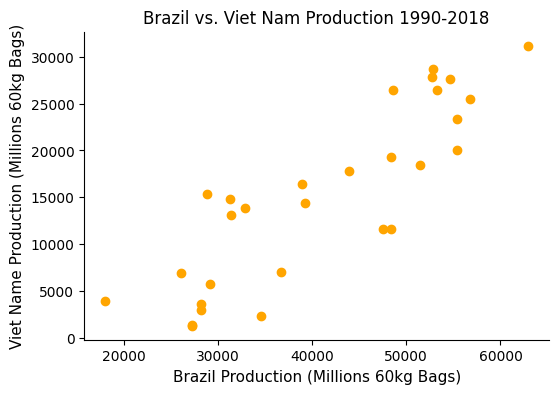

In [10]:
fig, ax = plt.subplots(figsize = (6,4))

ax.scatter(
    coffee_production['Brazil'],
    coffee_production['Viet Nam'],
    color = 'orange'
)

ax.set_title('Brazil vs. Viet Nam Production 1990-2018')
ax.set_ylabel('Viet Name Production (Millions 60kg Bags)', fontsize=11)
ax.set_xlabel('Brazil Production (Millions 60kg Bags)', fontsize=11)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

### Brazil vs. Venezuela

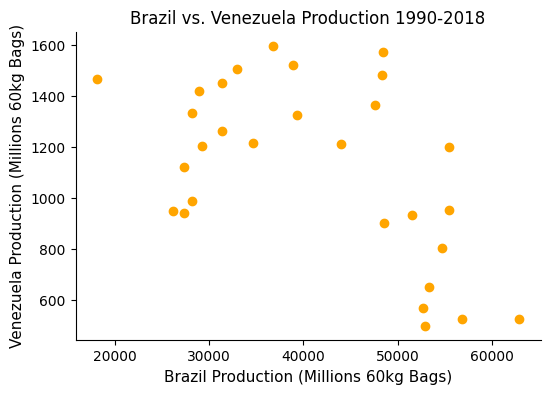

In [11]:
fig, ax = plt.subplots(figsize=(6,4))

ax.scatter(
    coffee_production['Brazil'],
    coffee_production['Venezuela'],
    color = 'orange'
)

ax.set_title('Brazil vs. Venezuela Production 1990-2018')
ax.set_xlabel('Brazil Production (Millions 60kg Bags)', fontsize=11)
ax.set_ylabel('Venezuela Production (Millions 60kg Bags)', fontsize=11)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

### Composition of Coffee Production
- Create a Pie Chart with the top 5 producers, as well as the sum for the rest of the countries
- Finally, create two donut charts, one representing Brazil's share of global production in 1900, and one for Brazil's share in 2018

### Top5 vs Rest of the World

In [12]:
coffee_production['Rest_of_World'] = (
    coffee_production.drop(
    ['Brazil', 'Viet Nam', 'Colombia', 'Indonesia', 'Ethiopia',], axis = 1).sum(axis=1)
)

coffee_production_top5_2018 = (
    coffee_production
    .loc['2018',
        ['Brazil', 'Viet Nam', 'Colombia', 'Indonesia', 'Ethiopia', 'Rest_of_World']
        ]
)

coffee_production_top5_2018

total_production
Brazil           62924.8836
Viet Nam         31174.0742
Colombia          13857.962
Indonesia         9417.5942
Ethiopia          7776.2234
Rest_of_World    45786.0003
Name: 2018, dtype: object

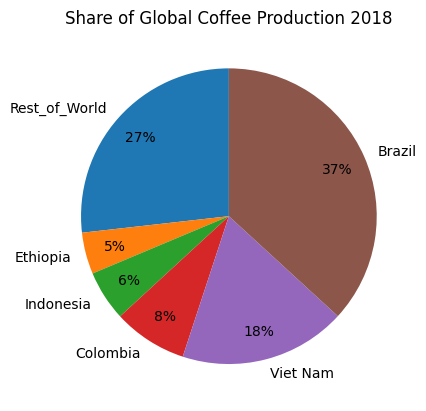

In [13]:
fig, ax = plt.subplots()

ax.pie(
    coffee_production_top5_2018[::-1], 
    labels = coffee_production_top5_2018.index[::-1],
    autopct="%.0f%%",
    pctdistance = .80,
    startangle=90
)
ax.set_title('Share of Global Coffee Production 2018')

plt.show()

### Brazil vs. Rest of the World

In [14]:
brazil_vs_others = (
    coffee_production
    .assign(others = coffee_production.drop('Brazil', axis = 1).sum(axis = 1))
    .loc[:, ['Brazil', 'others']]
    .astype({'Brazil': 'float64', 'others': 'float64'})
        
    )

brazil_vs_others

total_production,Brazil,others
1990,27285.6286,105831.7400
1991,27293.4934,117110.2770
1992,34603.3542,103163.1160
1993,28166.9786,103042.3560
1994,28192.0470,105516.0770
1995,18060.2022,113867.6570
1996,29196.7430,120052.3490
1997,26148.0040,117647.3100
1998,36760.8533,116119.3556
1999,47577.8065,136127.7035


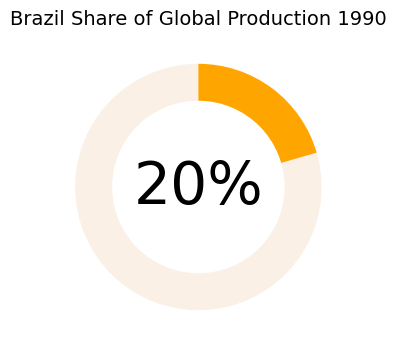

In [15]:
fig, ax = plt.subplots(figsize = (4,4))

ax.pie(
    brazil_vs_others.loc['1990'].sort_values(ascending=False),
    startangle = 90,
    labels = ['', ''],
    colors = ['linen', 'Orange']
)

hole = plt.Circle((0,0), 0.70, fc='white')

fig = plt.gcf()
fig.gca().add_artist(hole)

plt.text(
    0,
    0,
    f"{round((brazil_vs_others.loc['1990', 'Brazil'] / brazil_vs_others.loc['1990'].sum() * 100 ))}%",
    ha = 'center',
    va = 'center',
    fontsize = 42
)

ax.set_title('Brazil Share of Global Production 1990', fontsize = 14)

plt.show()

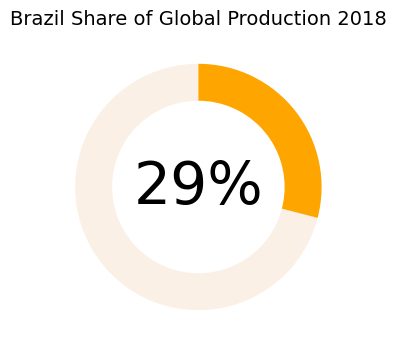

In [16]:
fig, ax = plt.subplots(figsize = (4,4))

ax.pie(
    brazil_vs_others.loc['2018'].sort_values(ascending=False),
    startangle = 90,
    labels = ['', ''],
    colors = ['linen', 'Orange']
)

hole = plt.Circle((0,0), 0.70, fc='white')

fig = plt.gcf()
fig.gca().add_artist(hole)

plt.text(
    0,
    0,
    f"{round((brazil_vs_others.loc['2018', 'Brazil'] / brazil_vs_others.loc['2018'].sum() * 100 ))}%",
    ha = 'center',
    va = 'center',
    fontsize = 42
)

ax.set_title('Brazil Share of Global Production 2018', fontsize = 14)

plt.show()

### Coffee Production Vs. Prices
- Compare coffee prices with coffee consumption in the following countries.
- Is there a relationship between coffee consumption and the price these countries pay?
- Plot a dual axis bar chart of price vs. consumption totals for these countries

In [17]:
imports = pd.read_csv('Data/coffee/imports.csv')
imports.head()

,imports,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Austria,1880.0,2058.0,2206.0,1836.0,1417.0,1231.0,1210.0,1294.0,1293.0,...,1309.0,1369.0,1452.0,1559.0,1555.0,NaN,NaN,NaN,NaN,NaN
1,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5916.0,5924.0,5828.0,5668.0,5502.0,NaN,NaN,NaN,NaN,NaN
2,Belgium/Luxembourg,2015.0,1746.0,1828.0,2063.0,2262.0,2401.0,2526.0,2544.0,3580.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bulgaria,268.0,200.0,182.0,397.0,463.0,515.0,272.0,294.0,342.0,...,523.0,528.0,482.0,560.0,609.0,NaN,NaN,NaN,NaN,NaN
4,Croatia,NaN,NaN,168.0,163.0,193.0,320.0,322.0,385.0,339.0,...,394.0,394.0,391.0,384.0,413.0,NaN,NaN,NaN,NaN,NaN


In [21]:
consumption = pd.read_csv('Data/coffee/imports.csv').set_index('imports').mean(axis = 1)
consumption.name = 'imports'

consumption

imports
   Austria               1551.083333
   Belgium               4639.533333
   Belgium/Luxembourg    2329.444444
   Bulgaria               397.250000
   Croatia                349.136364
                            ...     
South America             949.063449
Argentina                 626.416914
Chile                     261.124677
Suriname                   11.614819
Uruguay                    49.941523
Name: imports, Length: 147, dtype: float64

In [22]:
prices = pd.read_csv('Data/coffee/retail-prices.csv')
prices.head()

,retail_prices,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Austria,10.816777,10.088300,11.015453,10.971302,10.110375,11.434879,11.964680,9.646799,8.763797,...,15.342163,14.768212,18.366446,18.498896,19.028698,19.050773,16.423841,12.450331,13.730684,14.635762
1,Cyprus,6.247241,6.181015,6.335541,5.739514,7.019868,9.403974,9.116998,8.918322,10.176600,...,12.207506,11.501104,13.377483,14.039735,14.282561,14.304636,11.699779,11.699779,12.141280,12.781457
2,Denmark,8.410596,8.101545,8.366446,7.682119,9.823400,12.295806,10.618102,10.949227,10.860927,...,11.677704,12.008830,15.275938,14.834437,14.039735,14.194260,12.913907,10.905077,11.103753,11.699779
3,Finland,6.578366,6.004415,5.430464,4.282561,6.026490,8.763797,7.108168,7.726269,7.549669,...,7.748344,8.145695,11.832230,10.596026,9.470199,9.514349,8.609272,8.101545,9.050773,9.359823
4,France,8.233996,7.571744,5.099338,4.481236,5.298013,8.145695,7.284768,6.092715,6.136865,...,8.366446,7.991170,9.116998,8.653422,8.653422,8.322296,6.865342,7.196468,7.505519,8.123620


In [23]:
prices = pd.read_csv('Data/coffee/retail-prices.csv').set_index('retail_prices').mean(axis=1)
prices.head()

retail_prices
Austria    11.571135
Cyprus     10.437695
Denmark    10.494025
Finland     7.211692
France      6.850879
dtype: float64

In [27]:
price_cons = (
    pd.DataFrame(prices)
    .merge(
        consumption,
        left_on = prices.index,
        right_on = consumption.index,
        how = 'inner'
    )
    .sort_values(['imports'], ascending = False)
)

price_cons.columns = ['Country', 'Prices', 'Imports']

price_cons['Country'] = price_cons['Country'].str.strip(' ')
price_cons

,Country,Prices,Imports
5,Germany,9.515110,16357.666667
11,Japan,21.472939,6862.275235
6,Italy,14.199589,6696.958333
4,France,6.850879,6512.458333
9,Spain,8.029992,4046.291667
7,Netherlands,8.931263,2928.125000
10,Sweden,8.054350,1620.625000
0,Austria,11.571135,1551.083333
3,Finland,7.211692,1157.541667
2,Denmark,10.494025,991.791667


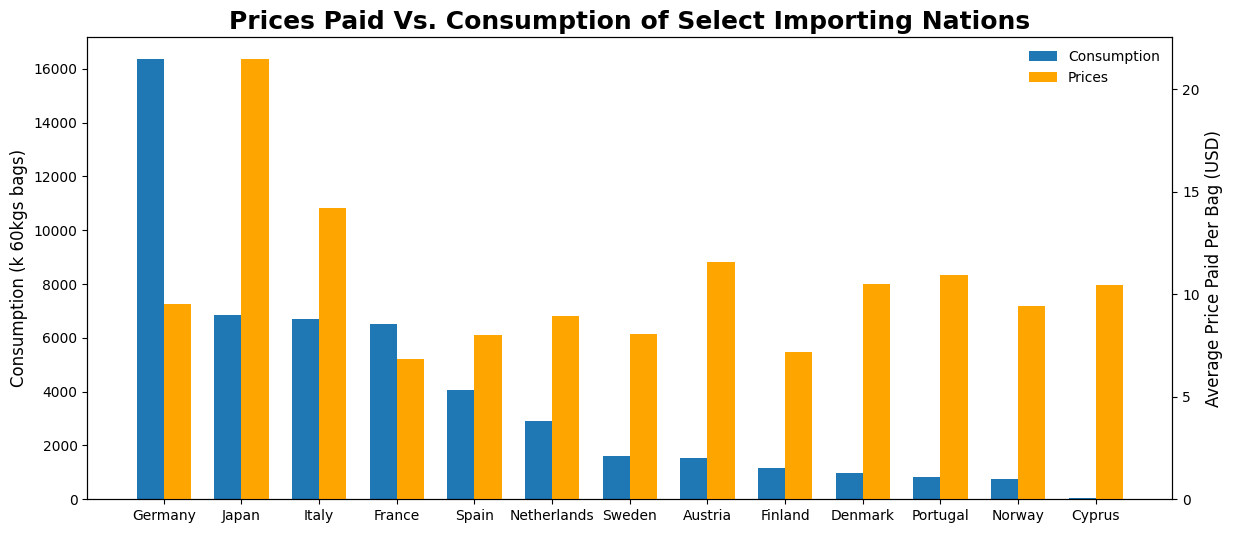

In [40]:
fig, ax = plt.subplots(figsize = (14,6))

width = 0.35
x = np.arange(len(price_cons['Country']))

bar1 = ax.bar(
    x - width/2,
    price_cons['Imports'],
    width = width
)

ax.set_title('Prices Paid Vs. Consumption of Select Importing Nations', fontsize = 18, fontweight = 'bold')
ax.set_ylabel('Consumption (k 60kgs bags)', fontsize = 12)

ax2 = ax.twinx()

bar2 = ax2.bar(
    x + width/2, 
    price_cons['Prices'],
    width = width,
    color = 'orange'
)

ax2.set_ylabel('Average Price Paid Per Bag (USD)', fontsize = 12)

plt.xticks(x, price_cons['Country'], fontsize = 7)

ax.legend([bar1, bar2], ['Consumption', 'Prices'], frameon = False)

plt.show()